# <div style="text-align:center">프로그래밍3 - 8조<br/><서울시 공공자전거 데이터 분석></div>
<div style="text-align: right"> <b>산업데이터사이언스학부 201704226 이건하</b></div>
<div style="text-align: right"> <b>산업데이터사이언스학부 201884040 김예영</b></div>
<div style="text-align: right"> <b>산업데이터사이언스학부 201884045 배상원</b></div>

## Module

In [1]:
#zip파일을 불러오기위해 zipfile과 시각화를위한 plt불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile

## 파일 불러오기

In [2]:
# zip 을 이용해 프밍3조별과제 폴더안에 있는 zip파일의 파일목록을 가져오기
from zipfile import ZipFile

zipped = zipfile.ZipFile('프밍3조별과제/서울특별시 공공자전거 이용정보(월별)_2021년.zip','r')
cp949_filename = [ x.encode('cp437').decode('cp949') for x in zipped.namelist()]

print(cp949_filename)

['서울특별시 공공자전거 이용정보(월별)_21.07.csv', '서울특별시 공공자전거 이용정보(월별)_21.08.csv', '서울특별시 공공자전거 이용정보(월별)_21.09.csv', '서울특별시 공공자전거 이용정보(월별)_21.10.csv', '서울특별시 공공자전거 이용정보(월별)_21.11.csv', '서울특별시 공공자전거 이용정보(월별)_21.12.csv', '서울특별시 공공자전거 이용정보(월별)_21.01.csv', '서울특별시 공공자전거 이용정보(월별)_21.02.csv', '서울특별시 공공자전거 이용정보(월별)_21.03.csv', '서울특별시 공공자전거 이용정보(월별)_21.04.csv', '서울특별시 공공자전거 이용정보(월별)_21.05.csv', '서울특별시 공공자전거 이용정보(월별)_21.06.csv']


In [3]:
# zip을 이용해 zip파일을 열어주기
source_file = '프밍3조별과제/서울특별시 공공자전거 이용정보(월별)_2021년.zip'

with zipfile.ZipFile(source_file, 'r') as zf:
    zipinfo = zf.infolist()
    for info in zipinfo:
        info.filename = info.filename.encode('cp437').decode('euc-kr')
        zf.extract(info)

## 월별 이용건수 확인

In [4]:
# zip 압축 해제한 파일을 찾아 bike01, bike02,... 이렇게 이름을 지정해 불러오기
# C:\Users\USER 해당 경로를 ./ 로 줄여서 씀.
bike01 = pd.read_csv('./서울특별시 공공자전거 이용정보(월별)_21.01.csv', encoding='cp949')
bike02 = pd.read_csv('./서울특별시 공공자전거 이용정보(월별)_21.02.csv', encoding='cp949')
bike03 = pd.read_csv('./서울특별시 공공자전거 이용정보(월별)_21.03.csv', encoding='cp949')
bike04 = pd.read_csv('./서울특별시 공공자전거 이용정보(월별)_21.04.csv', encoding='cp949')
bike05 = pd.read_csv('./서울특별시 공공자전거 이용정보(월별)_21.05.csv', encoding='cp949')
bike06 = pd.read_csv('./서울특별시 공공자전거 이용정보(월별)_21.06.csv', encoding='cp949')
bike07 = pd.read_csv('./서울특별시 공공자전거 이용정보(월별)_21.07.csv', encoding='cp949')
bike08 = pd.read_csv('./서울특별시 공공자전거 이용정보(월별)_21.08.csv', encoding='cp949')
bike09 = pd.read_csv('./서울특별시 공공자전거 이용정보(월별)_21.09.csv', encoding='cp949')
bike10 = pd.read_csv('./서울특별시 공공자전거 이용정보(월별)_21.10.csv', encoding='cp949')
bike11 = pd.read_csv('./서울특별시 공공자전거 이용정보(월별)_21.11.csv', encoding='cp949')
bike12 = pd.read_csv('./서울특별시 공공자전거 이용정보(월별)_21.12.csv', encoding='cp949')

In [5]:
aaa = (bike01[['이용건수']].sum(),
      bike02[['이용건수']].sum(),
      bike03[['이용건수']].sum(),
      bike04[['이용건수']].sum(),
      bike05[['이용건수']].sum(),
      bike06[['이용건수']].sum(),
      bike07[['이용건수']].sum(),
      bike08[['이용건수']].sum(),
      bike09[['이용건수']].sum(),
      bike10[['이용건수']].sum(),
      bike11[['이용건수']].sum(),
      bike12[['이용건수']].sum())
index_list = list(range(1,13))
aaa

(이용건수    792606
 dtype: int64,
 이용건수    1234545
 dtype: int64,
 이용건수    2184228
 dtype: int64,
 이용건수    3043238
 dtype: int64,
 이용건수    2950150
 dtype: int64,
 이용건수    3460407
 dtype: int64,
 이용건수    3377506
 dtype: int64,
 이용건수    3245974
 dtype: int64,
 이용건수    3736657
 dtype: int64,
 이용건수    3443785
 dtype: int64,
 이용건수    2737291
 dtype: int64,
 이용건수    1826746
 dtype: int64)

In [6]:
#1~12월의 총 이용건수를 비교   
AAA = pd.DataFrame(list(aaa),index= index_list)
AAA=AAA.rename_axis("월").reset_index().rename(columns={'이용건수': '총 이용건수'})
AAA.set_index("월")

,총 이용건수
월,
1,792606
2,1234545
3,2184228
4,3043238
5,2950150
6,3460407
7,3377506
8,3245974
9,3736657


In [7]:
# 한글이 깨지는 오류가 발생할때 사용

import matplotlib.font_manager as fm
font_path = 'C:/windows/Fonts/Malgun Gothic.ttf'
plt.rc('font', family='Malgun Gothic')

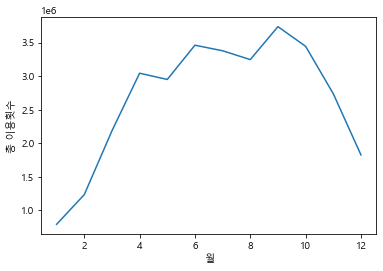

In [8]:
# 꺽은선 그래프로 이용량이 제일 많은 달 확인
x= [1,2,3,4,5,6,7,8,9,10,11,12]
y= aaa

plt.plot(x,y)
plt.xlabel("월")
plt.ylabel("총 이용횟수")
plt.show()

## 데이터 전처리

In [9]:
# 21년 9월 데이터 가져오기
bike09 = pd.read_csv('./서울특별시 공공자전거 이용정보(월별)_21.09.csv', encoding='cp949')
cols = bike09.columns
cols

Index(['대여일자', '대여소번호', '대여소명', '대여구분코드', '성별', '연령대코드', '이용건수', '운동량', '탄소량',
       '이용거리(M)', '이용시간(본)'],
      dtype='object')

In [10]:
bike09

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이용거리(M),이용시간(본)
0,2021-09,3,중랑센터,일일(회원),\N,AGE_003,1,179.45,1.84,7950.00,81
1,2021-09,3,중랑센터,일일(회원),M,AGE_005,1,0.00,0.00,0.00,20
2,2021-09,3,중랑센터,일일(회원),M,AGE_008,1,34.53,0.27,1178.47,26
3,2021-09,3,중랑센터,정기,\N,AGE_005,2,28.18,0.23,988.24,13
4,2021-09,3,중랑센터,정기,M,AGE_002,4,358.93,3.23,13944.28,95
...,...,...,...,...,...,...,...,...,...,...,...
128408,2021-09,9999,상담센터,정기,M,AGE_005,5,101.36,0.76,3285.17,155
128409,2021-09,9999,상담센터,정기,M,AGE_006,5,83.99,0.74,3176.45,62
128410,2021-09,9999,상담센터,정기,M,AGE_008,7,230.16,2.01,8638.56,216
128411,2021-09,99999,99999. 영남단말기정비,정기,\N,AGE_008,2,0.00,0.00,0.00,0


In [11]:
# na값 -1로 지정
bike09= bike09[['대여소번호','대여소명','성별','연령대코드','이용건수','이용거리(M)']]
bike09 = bike09.fillna(-1)  
bike09

,대여소번호,대여소명,성별,연령대코드,이용건수,이용거리(M)
0,3,중랑센터,\N,AGE_003,1,7950.00
1,3,중랑센터,M,AGE_005,1,0.00
2,3,중랑센터,M,AGE_008,1,1178.47
3,3,중랑센터,\N,AGE_005,2,988.24
4,3,중랑센터,M,AGE_002,4,13944.28
...,...,...,...,...,...,...
128408,9999,상담센터,M,AGE_005,5,3285.17
128409,9999,상담센터,M,AGE_006,5,3176.45
128410,9999,상담센터,M,AGE_008,7,8638.56
128411,99999,99999. 영남단말기정비,\N,AGE_008,2,0.00


In [12]:
bike09.describe(include=['object']).T   # 성별의 카테고리가 6개가 있음을 확인

,count,unique,top,freq
대여소명,128413,2503,502. 뚝섬유원지역 1번출구 앞,88
성별,128413,6,\N,38481
연령대코드,128413,8,AGE_002,23056


In [13]:
bike09[['성별']].drop_duplicates()   # 남자가 m,M 여자는 f,F로 나뉘어서 6개였던것  (\n은 외국인, 성별 미지정으로 알수없는 이용자, -1은 아까 바꾼 na값)

,성별
0,\N
1,M
11,-1
12,F
8976,f
15067,m


In [14]:
##남자 여자 대문자로 통일, \N값은 성별을 알 수 없으므로 -1로 지정
bike09 = bike09.replace("m","M")
bike09 = bike09.replace("f","F")
bike09 = bike09.replace("\\N",-1)
bike09

,대여소번호,대여소명,성별,연령대코드,이용건수,이용거리(M)
0,3,중랑센터,-1,AGE_003,1,7950.00
1,3,중랑센터,M,AGE_005,1,0.00
2,3,중랑센터,M,AGE_008,1,1178.47
3,3,중랑센터,-1,AGE_005,2,988.24
4,3,중랑센터,M,AGE_002,4,13944.28
...,...,...,...,...,...,...
128408,9999,상담센터,M,AGE_005,5,3285.17
128409,9999,상담센터,M,AGE_006,5,3176.45
128410,9999,상담센터,M,AGE_008,7,8638.56
128411,99999,99999. 영남단말기정비,-1,AGE_008,2,0.00


In [15]:
#남자는 0 여자는 1 로 교체
bike09 = bike09.replace("M",0)
bike09 = bike09.replace("F",1)

bike09

,대여소번호,대여소명,성별,연령대코드,이용건수,이용거리(M)
0,3,중랑센터,-1,AGE_003,1,7950.00
1,3,중랑센터,0,AGE_005,1,0.00
2,3,중랑센터,0,AGE_008,1,1178.47
3,3,중랑센터,-1,AGE_005,2,988.24
4,3,중랑센터,0,AGE_002,4,13944.28
...,...,...,...,...,...,...
128408,9999,상담센터,0,AGE_005,5,3285.17
128409,9999,상담센터,0,AGE_006,5,3176.45
128410,9999,상담센터,0,AGE_008,7,8638.56
128411,99999,99999. 영남단말기정비,-1,AGE_008,2,0.00


## 성별에 따른 분석

In [16]:
#남여 이용자 수 확인
bike09[['성별']].value_counts()
#남자 37775 여자 35324 남자이용자가 많음

성별
-1    55314
 0    37775
 1    35324
dtype: int64

In [17]:
#남여별 이용건수 확인
bike09[['성별','이용건수']].sort_values(['성별']).groupby('성별').sum()

,이용건수
성별,
-1,1478291
0,1315933
1,942433


In [18]:
#평균 이용횟수 확인
bike09[['성별','이용건수']].sort_values(['성별']).groupby('성별').mean()
#남자는 평균 34.8 여자는 26.6회

,이용건수
성별,
-1,26.725440
0,34.836082
1,26.679680


In [19]:
#남여 이용자 총 이동거리 확인
bike09[['성별','이용건수','이용거리(M)']].sort_values(['성별']).groupby('성별').sum()

,이용건수,이용거리(M)
성별,,
-1,1478291,3.988237e+09
0,1315933,3.500798e+09
1,942433,2.682088e+09


In [20]:
#이동거리/ 이용건수로 평균 이동거리 확인
a = bike09[['성별','이용건수']].sort_values(['성별']).groupby('성별').sum()
b = bike09[['성별','이용거리(M)']].sort_values(['성별']).groupby('성별').sum()
np.divide(b,a)

C:\Users\USER\AppData\Local\Temp/ipykernel_21024/1653506431.py:4: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  np.divide(b,a)


,이용거리(M)
성별,
-1,2697.869754
0,2660.316434
1,2845.918717


## 나이에 따른 분석

In [21]:
#asd라는 객체를 만들어서 연령대별 9월 이용인원 분석
asd = bike09[["연령대코드","성별"]].sort_values(["연령대코드"]).groupby("연령대코드").count()
asd = asd.rename(columns={'성별': '총 이용인원'})
asd

,총 이용인원
연령대코드,
AGE_001,17089
AGE_002,23056
AGE_003,20546
AGE_004,20357
AGE_005,15806
AGE_006,9350
AGE_007,3255
AGE_008,18954


<AxesSubplot:xlabel='연령대코드'>

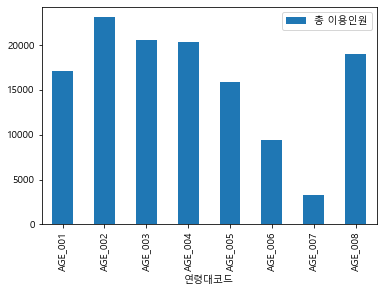

In [22]:
# 20대가 제일 많고 70대가 제일 적은 것을 알 수 있음
asd.plot.bar()

In [23]:
#qwe라는 객체를 만들어서 연령대별 성별을 우선 정렬했다.
qwe = bike09[['연령대코드','성별']].sort_values(["연령대코드"])
qwe

,연령대코드,성별
52446,AGE_001,-1
105722,AGE_001,0
15610,AGE_001,0
81140,AGE_001,1
105728,AGE_001,-1
...,...,...
107875,AGE_008,1
84430,AGE_008,0
61118,AGE_008,-1
84407,AGE_008,-1


In [24]:
#필요한 형식에 맟춰 성별 알수없음, 남자, 여자를 count()를 이용해 수를 새어준다
qwe1=qwe[qwe['성별']==-1].groupby('연령대코드').count().rename(columns={'성별': '알수 없음'})
qwe2 = qwe[qwe['성별']==0].groupby('연령대코드').count().rename(columns={'성별': '남자'})
qwe3 = qwe[qwe['성별']==1].groupby('연령대코드').count().rename(columns={'성별': '여자'})

In [25]:
#concat()을 이용하여  나이대별 성별의 수를 표현, axis=1를 이용해 옆으로 붙힘 
QWE = pd.concat([asd, qwe1,qwe2,qwe3],axis=1)
QWE

,총 이용인원,알수 없음,남자,여자
연령대코드,,,,
AGE_001,17089,7098,5317,4674
AGE_002,23056,11542,5725,5789
AGE_003,20546,9589,5467,5490
AGE_004,20357,8905,5832,5620
AGE_005,15806,6731,4714,4361
AGE_006,9350,3529,3378,2443
AGE_007,3255,915,1333,1007
AGE_008,18954,7005,6009,5940


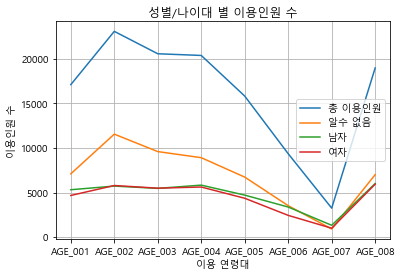

In [26]:
#위의 결과를 그래프를 통하여 표현 >> 성별을 알수없는 사람을 제외하고 남여를 비교하면 남자이용자의 수가 미세하게 많은것을 볼 수 있다.
x= QWE

x.plot(kind="line",grid = "True",title="성별/나이대 별 이용인원 수")
plt.rc('font', family='Malgun Gothic')
plt.xlabel("이용 연령대")
plt.ylabel("이용인원 수")
plt.legend()

## 이용자 수와 이용건수 제일 많은 대여소 top10 분석

In [27]:
#가장 이용건수가 많은 상위10개의 대여소를 알아보기위해 정렬을한다.
many_inggi = bike09[['대여소번호','대여소명','이용건수']].groupby(['대여소번호', '대여소명']).sum().sort_values(['이용건수'],ascending=False).reset_index().head(10)
many_inggi

,대여소번호,대여소명,이용건수
0,207,207. 여의나루역 1번출구 앞,20237
1,502,502. 뚝섬유원지역 1번출구 앞,20186
2,2715,2715.마곡나루역 2번 출구,11761
3,1210,1210. 롯데월드타워(잠실역2번출구 쪽),10319
4,2102,2102. 봉림교 교통섬,10286
5,583,583. 청계천 생태교실 앞,9558
6,272,272. 당산육갑문,9402
7,4217,4217. 한강공원 망원나들목,9071
8,2177,2177. 신대방역 2번 출구,8902
9,3533,3533. 건대입구역 사거리(롯데백화점),8768


<AxesSubplot:xlabel='대여소명'>

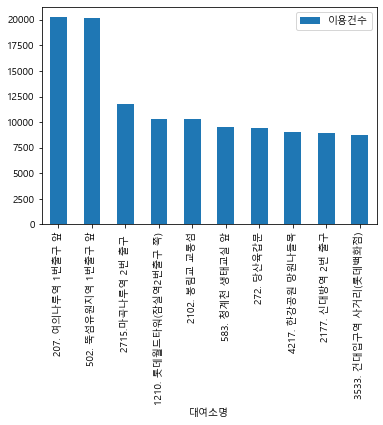

In [28]:
#막대 그래프를 이용해 상위10개의 대여소 이용 건수를 비교
many_inggi.plot(x='대여소명',y='이용건수', kind='bar')

In [29]:
#가장 이용자 수가 많은 상위 10개의 대여소를 비교
inggi=bike09[['대여소명','대여소번호']].groupby(['대여소명']).count().sort_values(['대여소번호'],ascending=False).rename(columns={"대여소번호":"이용자수"}).reset_index().head(10)
inggi

,대여소명,이용자수
0,502. 뚝섬유원지역 1번출구 앞,88
1,4217. 한강공원 망원나들목,87
2,207. 여의나루역 1번출구 앞,87
3,3515. 서울숲 관리사무소,86
4,2622. 올림픽공원역 3번출구,85
5,1268. 몽촌토성역 1번출구 옆,83
6,3533. 건대입구역 사거리(롯데백화점),82
7,2262. 한신16차아파트 119동 앞,82
8,565. 옥수역 3번출구,81
9,186. 월드컵공원,81


<AxesSubplot:xlabel='대여소명'>

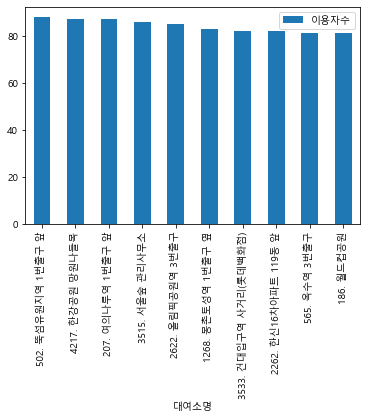

In [30]:
#막대 그래프를 이용해 상위10개의 대여소 이용 자수를 비교
import seaborn as sns
inggi.plot(x='대여소명',y='이용자수', kind='bar')